In [1]:
import pandas as pd
import helper as hlp

xl = pd.ExcelFile('TincyCo.xlsx')       # preparing the file for data extraction
sheet_names = xl.sheet_names            # Get sheet names as list
print(f"Your Excel file has \033[1;4;32m{str(len(sheet_names))}\033[0m sheets with names:")
for i, sheet_name in enumerate(sheet_names):
    print(f"Sheet \033[4;31m{str(i)}\033[0m = {sheet_name}")

Your Excel file has 6 sheets with names:
Sheet 0 = SKU Master
Sheet 1 = Store 312
Sheet 2 = Store 323
Sheet 3 = Store 415
Sheet 4 = Store 521
Sheet 5 = Store 632


In [2]:
# Reading sheets as data frame type
SKU_Master = xl.parse(sheet_names[0])           # Sheet 0 ===> to data frame type
Store_312 = xl.parse(sheet_names[1])            # Sheet 1 ===> to data frame type
Store_323 = xl.parse(sheet_names[2])            # Sheet 2 ===> to data frame type
Store_415 = xl.parse(sheet_names[3])            # Sheet 3 ===> to data frame type
Store_521 = xl.parse(sheet_names[4])            # Sheet 4 ===> to data frame type
Store_632 = xl.parse(sheet_names[5])            # Sheet 5 ===> to data frame type

# Working on Master Sheet
s_SKU_Master = hlp.strip_dataframe(SKU_Master)
ds_SKU_Master = hlp.drop_repeated_rows(s_SKU_Master)
hlp.empty_cells_info(ds_SKU_Master)


====  >  Your dataframe with size (9, 8) has been stripped.
====  >  Duplicated rows in your dataframe has been droped.
There were 0 duplicated rows.
size before apply : (9, 8)
size after apply :  (9, 8)
=====  >  Report
Rows in data frame = 9
+-----------------------+------------+-------+-------+-------+-----+------+-------+--------+
|      Column Name      | Department | Class | Style | Color | SKU | Cost | Price | Vendor |
+-----------------------+------------+-------+-------+-------+-----+------+-------+--------+
| Number of Empty cells |     1      |   1   |   1   |   1   |  0  |  0   |   0   |   0    |
+-----------------------+------------+-------+-------+-------+-----+------+-------+--------+
Total empty cells in this Data frame = 4 .


In [3]:
# Detecting pattern and Filling the empty cells of SKU_Master
ds_SKU_Master[ds_SKU_Master.columns[:2]] = ds_SKU_Master[ds_SKU_Master.columns[:2]].ffill()
ds_SKU_Master[ds_SKU_Master.columns[2:4]] = ds_SKU_Master[ds_SKU_Master.columns[2:4]].bfill()

In [4]:
ds_SKU_Master

,Department,Class,Style,Color,SKU,Cost,Price,Vendor
0,800.0,5.0,20.0,2.0,8000520021,7.5,9.99,MA Excellent Products
1,800.0,4.0,51.0,11.0,8000451112,9.0,12.99,MA Excellent Products
2,731.0,24.0,55.0,52.0,7312455520,25.0,31.99,MA Excellent Products
3,731.0,24.0,55.0,53.0,7312455530,14.5,22.99,GA General Wholesales
4,5001.0,201.0,12.0,4.0,50012011240,2.5,7.99,China Imports
5,5001.0,201.0,12.0,5.0,50012011250,7.5,9.99,China Imports
6,5001.0,201.0,13.0,4.0,50012011340,6.0,5.99,China Imports
7,5001.0,201.0,13.0,4.0,50012011341,8.0,6.99,China Imports
8,5001.0,300.0,1.0,1.0,50013000110,6.5,12.99,China Imports


## concatenating All Sheet's Infos

In [5]:
All_Stores = pd.concat([Store_312, Store_323, Store_415, Store_521, Store_632])
All_Stores.shape

(19278, 6)

In [6]:
All_Stores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19278 entries, 0 to 4952
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DB_ID         19278 non-null  int64         
 1   SKU           19278 non-null  object        
 2   Store         19278 non-null  int64         
 3   Date          19278 non-null  datetime64[ns]
 4   Unit Sales    19017 non-null  object        
 5   Dollar Sales  18909 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 1.0+ MB


## Stripping

In [7]:
s_All_Stores = hlp.strip_dataframe(All_Stores)

====  >  Your dataframe with size (19278, 6) has been stripped.


## Drop Repeated Rows

In [8]:
s_All_Stores[s_All_Stores.duplicated(keep=False)].reset_index()         # Show repeated rows

,index,DB_ID,SKU,Store,Date,Unit Sales,Dollar Sales
0,3228,2001331,50012011240,312,2014-11-13,2,15.98
1,3229,2001331,50012011240,312,2014-11-13,2,15.98
2,3351,2001453,50012011240,312,2015-04-22,5,39.95
3,3352,2001453,50012011240,312,2015-04-22,5,39.95
4,3500,2001601,50012011240,312,2015-11-03,1,7.99
5,3501,2001601,50012011240,312,2015-11-03,1,7.99
6,1791,35006,50012011240,323,2004-08-20,4,31.96
7,1792,35006,50012011240,323,2004-08-20,4,31.96
8,1864,35078,50012011240,323,2004-11-23,1,7.99
9,1865,35078,50012011240,323,2004-11-23,1,7.99


In [9]:
ds_All_Stores = hlp.drop_repeated_rows(s_All_Stores)                # Dropping ...

====  >  Duplicated rows in your dataframe has been droped.
There were 17 duplicated rows.
size before apply : (19278, 6)
size after apply :  (19261, 6)


In [10]:
# Show the number of all empty celss in the df
hlp.empty_cells_info(ds_All_Stores)

=====  >  Report
Rows in data frame = 19261
+-----------------------+-------+-----+-------+------+------------+--------------+
|      Column Name      | DB_ID | SKU | Store | Date | Unit Sales | Dollar Sales |
+-----------------------+-------+-----+-------+------+------------+--------------+
| Number of Empty cells |   0   |  0  |   0   |  0   |    259     |     367      |
+-----------------------+-------+-----+-------+------+------------+--------------+
Total empty cells in this Data frame = 626 .


In [11]:
# Show distinct values with types of cols
hlp.count_distinct_values(ds_All_Stores)

=====  >  Report
Rows in data frame = 19261
+-------------------------+-------+--------+-------+----------------+------------+--------------+
|       Column Name       | DB_ID |  SKU   | Store |      Date      | Unit Sales | Dollar Sales |
+-------------------------+-------+--------+-------+----------------+------------+--------------+
| Number of unique values | 18339 |   10   |   5   |      1288      |    118     |     213      |
|        Data type        | int64 | object | int64 | datetime64[ns] |   object   |   float64    |
+-------------------------+-------+--------+-------+----------------+------------+--------------+


In [12]:
# Checking the presence of human error(s) in the columns that have object datatype
spv_Result_0 = hlp.detect_special_values(ds_All_Stores['SKU'])

+-------------+-------+
|    Value    | Count |
+-------------+-------+
| 50*12011250 |   30  |
+-------------+-------+


In [13]:
ds_All_Stores['SKU'] = ds_All_Stores['SKU'].replace('50*12011250', 50012011250)

C:\Users\home\AppData\Local\Temp\ipykernel_4332\3003484768.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ds_All_Stores['SKU'] = ds_All_Stores['SKU'].replace('50*12011250', 50012011250)


In [14]:
hlp.count_distinct_values(ds_All_Stores) 

=====  >  Report
Rows in data frame = 19261
+-------------------------+-------+-------+-------+----------------+------------+--------------+
|       Column Name       | DB_ID |  SKU  | Store |      Date      | Unit Sales | Dollar Sales |
+-------------------------+-------+-------+-------+----------------+------------+--------------+
| Number of unique values | 18339 |   9   |   5   |      1288      |    118     |     213      |
|        Data type        | int64 | int64 | int64 | datetime64[ns] |   object   |   float64    |
+-------------------------+-------+-------+-------+----------------+------------+--------------+


In [15]:
spv_Result_1 = hlp.detect_special_values(ds_All_Stores['Unit Sales'])

+----------+-------+
|  Value   | Count |
+----------+-------+
|    -2    |   24  |
|    -1    |   22  |
|    -3    |   19  |
|  +9-A1   |   16  |
| -A45%0 2 |   13  |
|    -4    |   10  |
|  +9-A2   |   10  |
| -A45%0 3 |   10  |
|   #0 1   |   8   |
|   #0 3   |   8   |
|    -5    |   6   |
|  +9-A0   |   6   |
| -A45%0 4 |   6   |
| -A45%0 5 |   6   |
|   #0 2   |   5   |
|    -6    |   4   |
| -A45%0 1 |   4   |
|  +9-A3   |   4   |
|   #0 4   |   4   |
|   #0 0   |   3   |
| -A45%0 6 |   2   |
| -A45%0 9 |   1   |
|   #0 5   |   1   |
|    -9    |   1   |
| -A45%0 7 |   1   |
+----------+-------+


In [16]:
ds_All_Stores['Unit Sales'] = ds_All_Stores['Unit Sales'].replace(-2, 2)
ds_All_Stores['Unit Sales'] = ds_All_Stores['Unit Sales'].replace(-1, 1)
ds_All_Stores['Unit Sales'] = ds_All_Stores['Unit Sales'].replace(-3, 3)
ds_All_Stores['Unit Sales'] = ds_All_Stores['Unit Sales'].replace('+9-A1', 9)
ds_All_Stores['Unit Sales'] = ds_All_Stores['Unit Sales'].replace('-A45%0 2', 2)
ds_All_Stores['Unit Sales'] = ds_All_Stores['Unit Sales'].replace(-4, 1)
ds_All_Stores['Unit Sales'] = ds_All_Stores['Unit Sales'].replace('+9-A2', 9)
ds_All_Stores['Unit Sales'] = ds_All_Stores['Unit Sales'].replace('-A45%0 3', 3)
ds_All_Stores['Unit Sales'] = ds_All_Stores['Unit Sales'].replace('#0 1', 1)
ds_All_Stores['Unit Sales'] = ds_All_Stores['Unit Sales'].replace('#0 3', 3)
ds_All_Stores['Unit Sales'] = ds_All_Stores['Unit Sales'].replace(-5, 5)
ds_All_Stores['Unit Sales'] = ds_All_Stores['Unit Sales'].replace('-A45%0 4', 4)
ds_All_Stores['Unit Sales'] = ds_All_Stores['Unit Sales'].replace('+9-A0', 9)
ds_All_Stores['Unit Sales'] = ds_All_Stores['Unit Sales'].replace('-A45%0 5', 5)
ds_All_Stores['Unit Sales'] = ds_All_Stores['Unit Sales'].replace('#0 2', 2)
ds_All_Stores['Unit Sales'] = ds_All_Stores['Unit Sales'].replace(-6, 6)
ds_All_Stores['Unit Sales'] = ds_All_Stores['Unit Sales'].replace('-A45%0 1', 1)
ds_All_Stores['Unit Sales'] = ds_All_Stores['Unit Sales'].replace('+9-A3', 9)
ds_All_Stores['Unit Sales'] = ds_All_Stores['Unit Sales'].replace('#0 4', 4)
ds_All_Stores['Unit Sales'] = ds_All_Stores['Unit Sales'].replace('#0 0', 9)
ds_All_Stores['Unit Sales'] = ds_All_Stores['Unit Sales'].replace('-A45%0 6', 6)
ds_All_Stores['Unit Sales'] = ds_All_Stores['Unit Sales'].replace(-9, 9)
ds_All_Stores['Unit Sales'] = ds_All_Stores['Unit Sales'].replace('-A45%0 9', 9)
ds_All_Stores['Unit Sales'] = ds_All_Stores['Unit Sales'].replace('#0 5', 5)
ds_All_Stores['Unit Sales'] = ds_All_Stores['Unit Sales'].replace('-A45%0 7', 7)

C:\Users\home\AppData\Local\Temp\ipykernel_4332\2748627579.py:25: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ds_All_Stores['Unit Sales'] = ds_All_Stores['Unit Sales'].replace('-A45%0 7', 7)


In [17]:
hlp.count_distinct_values(ds_All_Stores) 

=====  >  Report
Rows in data frame = 19261
+-------------------------+-------+-------+-------+----------------+------------+--------------+
|       Column Name       | DB_ID |  SKU  | Store |      Date      | Unit Sales | Dollar Sales |
+-------------------------+-------+-------+-------+----------------+------------+--------------+
| Number of unique values | 18339 |   9   |   5   |      1288      |     93     |     213      |
|        Data type        | int64 | int64 | int64 | datetime64[ns] |  float64   |   float64    |
+-------------------------+-------+-------+-------+----------------+------------+--------------+


# Issues:<br>
    1- Some cells are empty
    2- There were negative numbers in column 'Unit Sales', and after correction, we must correct their corresponding numbers in column 'Dollar Sales'.
    3- finding outliers and out of range numbers for column 'Unit Sales'.

In [18]:
out_ds_All_Stores = hlp.detect_outliers(ds_All_Stores,'Unit Sales')         #Detecting outlier values 
out_ds_All_Stores_desc = out_ds_All_Stores.sort_values(by='Unit Sales', ascending=False).reset_index()      #Upper Values
out_ds_All_Stores_desc.head(40)
# There are 32 rows whose 'Unit Sales'_values are out of range or Outlier
# we delete these rows according to their DB_ID in main data frame = ds_All_Stores

,index,DB_ID,SKU,Store,Date,Unit Sales,Dollar Sales
0,2500,81405,50012011250,521,2004-12-11,90000.0,899100.00
1,474,79918,50012011250,312,2016-02-18,60000.0,599400.00
2,2612,80370,50012011250,323,2005-08-05,60000.0,599400.00
3,2612,80830,50012011250,415,2005-01-31,60000.0,599400.00
4,4247,82350,50012011250,632,2006-01-23,50000.0,499500.00
5,2657,80875,50012011250,415,2005-03-25,50000.0,499500.00
6,2897,81115,50012011250,415,2006-01-07,50000.0,499500.00
7,589,80033,50012011250,312,2016-07-05,50000.0,499500.00
8,89,79533,50012011250,312,2014-11-18,50000.0,499500.00
9,2813,81031,50012011250,415,2005-09-29,50000.0,499500.00


In [19]:
# drop rows that have a value greater than or equal to 10000 in the 'Unit Sales' column
ds_All_Stores.drop(ds_All_Stores[ds_All_Stores['Unit Sales'] >= 10000].index, inplace=True)
print("The upper outlier numbers are \033[1;32mdropped ✔\033[0m.")

The upper outlier numbers are dropped ✔.


In [20]:
ds_All_Stores.sort_values(by='Unit Sales', ascending=False).head(10)

,DB_ID,SKU,Store,Date,Unit Sales,Dollar Sales
1634,93516,8000451112,632,2006-06-24,105.0,1363.95
1560,93442,8000451112,632,2006-05-27,91.0,1182.09
1543,93425,8000451112,632,2006-05-20,88.0,1143.12
1630,93512,8000451112,632,2006-06-23,83.0,1078.17
1349,93231,8000451112,632,2006-03-04,82.0,1065.18
1756,93638,8000451112,632,2006-08-12,81.0,1052.19
1652,93534,8000451112,632,2006-07-01,81.0,1052.19
1410,93292,8000451112,632,2006-03-31,80.0,1039.20
1592,93474,8000451112,632,2006-06-09,79.0,1026.21
1582,93464,8000451112,632,2006-06-03,78.0,1013.22


In [21]:
out_ds_All_Stores_asc = out_ds_All_Stores.sort_values(by='Unit Sales').reset_index()      #Lower Values
out_ds_All_Stores_asc.head(10)
# این مقادیر پایینی هم قاعدتا کمترین مقدار از مقادیر بازه بالایی اوتلایر هستند
# چون عملا با مثبت کردن مقادیر واحد فروش عدد منفی نداریم و کمترین از صفر شروع می شود
# پس برای داده های پایینی کار خاصی لازم نیست 

,index,DB_ID,SKU,Store,Date,Unit Sales,Dollar Sales
0,2798,1000680,8000520021,312,2015-05-23,13.0,129.87
1,1341,93223,8000451112,632,2006-03-01,13.0,168.87
2,3139,89433,8000520021,632,2006-05-19,13.0,129.87
3,3175,89469,8000520021,632,2006-06-09,13.0,129.87
4,3179,89473,8000520021,632,2006-06-10,13.0,129.87
5,288,92170,8000451112,632,2004-08-25,13.0,168.87
6,298,92180,8000451112,632,2004-09-02,13.0,168.87
7,332,92214,8000451112,632,2004-09-22,13.0,168.87
8,337,92219,8000451112,632,2004-09-23,13.0,168.87
9,357,92239,8000451112,632,2004-10-12,13.0,168.87


In [22]:
# آخرین تغییرات اعمال شده روی جدول اصلی
ds_All_Stores.sample(5)

,DB_ID,SKU,Store,Date,Unit Sales,Dollar Sales
4866,85008,50012011341,632,2006-05-19,1.0,4.99
1018,66401,8000520021,521,2004-09-23,1.0,9.99
1290,35983,8000520021,415,2005-03-14,1.0,29.99
2335,35040,50012011240,521,2006-05-30,4.0,31.96
1830,35044,50012011240,323,2004-10-12,2.0,15.98


In [23]:
# حال مشکل دوم این است که در ستون مبلغ فروش مقادیر منفی را مثبت کنیم

# apply the abs() function on the 'Dollar Sales' column
ds_All_Stores['Dollar Sales'] = ds_All_Stores['Dollar Sales'].abs()
ds_All_Stores.sort_values(by='Dollar Sales').head(10)

,DB_ID,SKU,Store,Date,Unit Sales,Dollar Sales
3054,84096,50012011340,521,2004-10-28,0.0,0.0
3137,83580,50012011340,415,2004-11-01,0.0,0.0
3142,83585,50012011340,415,2004-11-10,0.0,0.0
3154,83597,50012011340,415,2004-11-24,0.0,0.0
2462,81366,50012011250,521,2004-10-26,0.0,0.0
2069,1145832,50012011240,415,2005-01-26,0.0,0.0
3349,78990,50012011240,632,2004-10-29,0.0,0.0
2238,35449,50012011240,323,2006-05-11,0.0,0.0
2135,1145897,50012011240,415,2005-04-23,0.0,0.0
3382,79023,50012011240,632,2004-12-18,0.0,0.0


In [24]:
#  خب همینطور که می بینیم کمترین مقادیر از صفر شروع شده اند که به این معنی است که عدد منفی نداریم
# منتهی باید یک فکری هم برای این اعداد صفر بکنیم
frequency = ds_All_Stores['Unit Sales'].value_counts()
frequency[0]
# there are 34 cells which contain 0-value.

np.int64(145)

In [25]:
# این 145 تا سطر را حذف می کنیم

ds_All_Stores.drop(ds_All_Stores[ds_All_Stores['Unit Sales'] == 0].index, inplace=True)

In [26]:
ds_All_Stores.shape

(18548, 6)

In [27]:
# بعد از دراپ کردن ردیف های حاوی مقادیر صفر مجددا دیتاست را بر اساس صعودی مرتب می کنیم 
ds_All_Stores.sort_values(by='Dollar Sales').head(10)

,DB_ID,SKU,Store,Date,Unit Sales,Dollar Sales
4866,85008,50012011341,632,2006-05-19,1.0,4.99
4916,85058,50012011341,632,2006-08-04,1.0,4.99
4917,85059,50012011341,632,2006-08-05,1.0,4.99
4897,85039,50012011341,632,2006-07-05,1.0,4.99
4900,85042,50012011341,632,2006-07-10,1.0,4.99
3481,84523,50012011341,521,2006-06-30,1.0,4.99
3484,84526,50012011341,521,2006-07-04,1.0,4.99
3488,84530,50012011341,521,2006-07-08,1.0,4.99
3471,84513,50012011341,521,2006-06-15,1.0,4.99
1012,82912,50012011341,312,2016-03-15,1.0,4.99


In [28]:
# mpt_inc_cols = Empty Included Columns
# یک جدول موقتی می سازیم که ببینیم چطور می توانیم راه حلی برای پر کردن دادههای 
# خالی پیدا کنیم 
mpt_inc_cols_ds_All_Stores = ds_All_Stores[ds_All_Stores['Unit Sales'].isna() | ds_All_Stores['Dollar Sales'].isna()]
mpt_inc_cols_ds_All_Stores.reset_index()

,index,DB_ID,SKU,Store,Date,Unit Sales,Dollar Sales
0,16,79460,50012011250,312,2014-08-22,NaN,NaN
1,26,79470,50012011250,312,2014-09-03,9.0,NaN
2,49,79493,50012011250,312,2014-10-02,NaN,NaN
3,55,79499,50012011250,312,2014-10-09,NaN,NaN
4,58,79502,50012011250,312,2014-10-13,2.0,NaN
...,...,...,...,...,...,...,...
351,4884,85026,50012011341,632,2006-06-15,9.0,NaN
352,4888,85030,50012011341,632,2006-06-23,NaN,NaN
353,4895,85037,50012011341,632,2006-07-01,NaN,NaN
354,4949,82174,50012011250,632,2005-06-22,4.0,NaN


In [29]:
# ابتدا تعداد خانه های خالی همین جدول را بررسی می کنیم
hlp.empty_cells_info(mpt_inc_cols_ds_All_Stores)

=====  >  Report
Rows in data frame = 356
+-----------------------+-------+-----+-------+------+------------+--------------+
|      Column Name      | DB_ID | SKU | Store | Date | Unit Sales | Dollar Sales |
+-----------------------+-------+-----+-------+------+------------+--------------+
| Number of Empty cells |   0   |  0  |   0   |  0   |    251     |     356      |
+-----------------------+-------+-----+-------+------+------------+--------------+
Total empty cells in this Data frame = 607 .


In [30]:
# سایز جدول 356 است 
# تعداد خانه های خالی ستون مبلغ فروش هم 356 است
# پس دو حالت داریم 
# ردیف هایی که فقط مبلغ فروششان خالی است
# ردیف هایی که هر دو ستون واحد فروش و مبلغ فروششان خالی است

In [31]:
# devide this table into 2 part
# جدول را به دو قسمت تقسیم می کنیم 
# آنهایی که تعداد فروششان پر است ولی مبلغ پرداختی شان خالی است بعنوان گروه یک
# آنهایی که هم تعداد فروش و هم مبلغ پرداختی شان خالی است بعنوان گروه دو
# part_1 = Unit_Sales is not empty but Dollar_Sales is empty
# part_2 = both of them are empty 
mpt_inc_cols_ds_All_Stores_part1 = mpt_inc_cols_ds_All_Stores[mpt_inc_cols_ds_All_Stores['Unit Sales'].notna() & mpt_inc_cols_ds_All_Stores['Dollar Sales'].isna()]
mpt_inc_cols_ds_All_Stores_part1.sample(5)

,DB_ID,SKU,Store,Date,Unit Sales,Dollar Sales
3174,83617,50012011340,415,2004-12-22,9.0,NaN
3546,2001646,50012011240,312,2015-12-30,3.0,NaN
2920,81138,50012011250,415,2006-02-04,4.0,NaN
1814,35028,50012011240,323,2004-09-22,1.0,NaN
4950,82341,50012011250,632,2006-01-12,2.0,NaN


In [32]:
mpt_inc_cols_ds_All_Stores_part1.shape

(105, 6)

In [33]:
# آنهایی که هر دو تا ستون شان خالی است
mpt_inc_cols_ds_All_Stores_part2 = mpt_inc_cols_ds_All_Stores[mpt_inc_cols_ds_All_Stores['Unit Sales'].isna() & mpt_inc_cols_ds_All_Stores['Dollar Sales'].isna()]
mpt_inc_cols_ds_All_Stores_part2.sample(5)

,DB_ID,SKU,Store,Date,Unit Sales,Dollar Sales
3350,2001452,50012011240,312,2015-04-21,NaN,NaN
3115,84157,50012011340,521,2005-01-15,NaN,NaN
3316,83407,50012011341,323,2006-02-25,NaN,NaN
3315,84357,50012011340,521,2005-11-15,NaN,NaN
894,82794,50012011340,312,2015-09-23,NaN,NaN


In [34]:
mpt_inc_cols_ds_All_Stores_part2.shape

(251, 6)

In [35]:
# راه حل گروه اول این است که از جدول اصلی قیمت را فراخوانی کنیم و این قیمت را در تعداد فروش ضرب کنیم تا مبلغ فروش بدست آید
# راه حل گروه دوم قرار دادن میانگین تعداد فروش ماهیانه به جای تعداد فروش و ضرب آن در قیمت خواهد بود
# برای این کار در جدول اصلی چند ستون اضافه می کنیم
# اضافه کردن ستون های ماه و سال برای دیتاست
#   ==== > جدول اصلی
main1 = ds_All_Stores
main1.head(1)

,DB_ID,SKU,Store,Date,Unit Sales,Dollar Sales
0,79444,50012011250,312,2014-08-04,3.0,29.97


In [36]:
# اضافه کردن ستون ماه و سال
main1['Month'] = main1['Date'].dt.month
main1['Year'] = main1['Date'].dt.year
# main1.head(1)
# اضافه کردن ستون های قیمت و هزینه از دیتاست شیت اصلی
main2 = main1.merge(
    ds_SKU_Master[['SKU', 'Cost', 'Price']],
    on='SKU',
    how='left'
)
main2.head()

,DB_ID,SKU,Store,Date,Unit Sales,Dollar Sales,Month,Year,Cost,Price
0,79444,50012011250,312,2014-08-04,3.0,29.97,8,2014,7.5,9.99
1,79445,50012011250,312,2014-08-05,2.0,19.98,8,2014,7.5,9.99
2,79446,50012011250,312,2014-08-06,5.0,49.95,8,2014,7.5,9.99
3,79447,50012011250,312,2014-08-07,3.0,29.97,8,2014,7.5,9.99
4,79448,50012011250,312,2014-08-08,7.0,69.93,8,2014,7.5,9.99


In [37]:
hlp.empty_cells_info(main2)
# خانه های خالی این جدول جدید همان خانه ها هستند با این تفاوت که در این جدول چند ستون کمکی اضافه شده است 

=====  >  Report
Rows in data frame = 18548
+-----------------------+-------+-----+-------+------+------------+--------------+-------+------+------+-------+
|      Column Name      | DB_ID | SKU | Store | Date | Unit Sales | Dollar Sales | Month | Year | Cost | Price |
+-----------------------+-------+-----+-------+------+------------+--------------+-------+------+------+-------+
| Number of Empty cells |   0   |  0  |   0   |  0   |    251     |     356      |   0   |  0   |  0   |   0   |
+-----------------------+-------+-----+-------+------+------------+--------------+-------+------+------+-------+
Total empty cells in this Data frame = 607 .


In [38]:
# راه حل اول
main2['Dollar Sales'] = main2['Dollar Sales'].fillna(main2['Unit Sales'] * main2['Price'])

In [39]:
hlp.empty_cells_info(main2)

=====  >  Report
Rows in data frame = 18548
+-----------------------+-------+-----+-------+------+------------+--------------+-------+------+------+-------+
|      Column Name      | DB_ID | SKU | Store | Date | Unit Sales | Dollar Sales | Month | Year | Cost | Price |
+-----------------------+-------+-----+-------+------+------------+--------------+-------+------+------+-------+
| Number of Empty cells |   0   |  0  |   0   |  0   |    251     |     251      |   0   |  0   |  0   |   0   |
+-----------------------+-------+-----+-------+------+------------+--------------+-------+------+------+-------+
Total empty cells in this Data frame = 502 .


In [40]:
# راه حل دوم
# Calculate the monthly average sales for each product
# مشاهده اطلاعات مجزا و منحصربفرد ستون سال
# hlp.count_distinct_values(main2)
main2['Year'].value_counts()

Year
2005    7511
2006    4544
2004    2946
2015    1755
2016    1139
2014     653
Name: count, dtype: int64

In [41]:
# گروه بندی بر اساس 3 آیتم کد کالا و سال و ماه انجام می دهیم 
# حتی می توانیم بر اساس 4 آیتم کد کالا و سال و ماه و کد فروشگاه هم اینکار را انجام دهیم
# ستونی که لازم داریم میانگین فروش ماهیانه بر روی ستون واحد فروش به صورت متد میانگین است

grp_main2 = main2.groupby(['SKU', 'Year', 'Month']).agg(
    monthly_avg_sales = ('Unit Sales', 'mean')
).reset_index()
grp_main2.loc[:,'monthly_avg_sales'] = round(grp_main2['monthly_avg_sales'],0)
grp_main2.sample(10)


,SKU,Year,Month,monthly_avg_sales
70,7312455530,2006,4,1.0
251,50012011250,2004,9,4.0
199,8000520021,2016,8,4.0
164,8000520021,2005,10,5.0
112,8000451112,2005,8,10.0
139,8000451112,2015,10,25.0
278,50012011250,2014,11,3.0
161,8000520021,2005,7,6.0
136,8000451112,2015,7,11.0
121,8000451112,2006,5,20.0


In [42]:
# ساختن دیتاستی که یک ستون میانگین فروش ماه بیشتر از قبلی دارد
main3 = main2.merge(grp_main2, on=['SKU', 'Year', 'Month'], how='left')
main3.head()

,DB_ID,SKU,Store,Date,Unit Sales,Dollar Sales,Month,Year,Cost,Price,monthly_avg_sales
0,79444,50012011250,312,2014-08-04,3.0,29.97,8,2014,7.5,9.99,3.0
1,79445,50012011250,312,2014-08-05,2.0,19.98,8,2014,7.5,9.99,3.0
2,79446,50012011250,312,2014-08-06,5.0,49.95,8,2014,7.5,9.99,3.0
3,79447,50012011250,312,2014-08-07,3.0,29.97,8,2014,7.5,9.99,3.0
4,79448,50012011250,312,2014-08-08,7.0,69.93,8,2014,7.5,9.99,3.0


In [43]:
hlp.empty_cells_info(main3)

=====  >  Report
Rows in data frame = 18548
+-----------------------+-------+-----+-------+------+------------+--------------+-------+------+------+-------+-------------------+
|      Column Name      | DB_ID | SKU | Store | Date | Unit Sales | Dollar Sales | Month | Year | Cost | Price | monthly_avg_sales |
+-----------------------+-------+-----+-------+------+------------+--------------+-------+------+------+-------+-------------------+
| Number of Empty cells |   0   |  0  |   0   |  0   |    251     |     251      |   0   |  0   |  0   |   0   |         0         |
+-----------------------+-------+-----+-------+------+------------+--------------+-------+------+------+-------+-------------------+
Total empty cells in this Data frame = 502 .


In [44]:
mpt_inc_cols_main3 = main3[main3['Unit Sales'].isna() | main3['Dollar Sales'].isna()]
mpt_inc_cols_main3

,DB_ID,SKU,Store,Date,Unit Sales,Dollar Sales,Month,Year,Cost,Price,monthly_avg_sales
16,79460,50012011250,312,2014-08-22,NaN,NaN,8,2014,7.5,9.99,3.0
48,79493,50012011250,312,2014-10-02,NaN,NaN,10,2014,7.5,9.99,3.0
54,79499,50012011250,312,2014-10-09,NaN,NaN,10,2014,7.5,9.99,3.0
84,79529,50012011250,312,2014-11-13,NaN,NaN,11,2014,7.5,9.99,3.0
116,79563,50012011250,312,2014-12-23,NaN,NaN,12,2014,7.5,9.99,4.0
...,...,...,...,...,...,...,...,...,...,...,...
18393,84937,50012011341,632,2006-02-09,NaN,NaN,2,2006,8.0,6.99,2.0
18414,84958,50012011341,632,2006-03-10,NaN,NaN,3,2006,8.0,6.99,2.0
18417,84961,50012011341,632,2006-03-14,NaN,NaN,3,2006,8.0,6.99,2.0
18485,85030,50012011341,632,2006-06-23,NaN,NaN,6,2006,8.0,6.99,2.0


In [45]:
mpt_inc_cols_main3.shape

(251, 11)

In [46]:
# حال مثل راه حل اول عمل می کنیم
# هر جا که تعداد واحد فروش رفته خالی بود مقدار متناظرش در ستون میانگین فروش ماهیانه را وارد می کنیم
# سپس با ضرب کردن این عدد در قیمت کالا مبلغ فروش را هم پر می کنیم
main3['Unit Sales'] = main3['Unit Sales'].fillna(main3['monthly_avg_sales'])
main3['Dollar Sales'] = main3['Dollar Sales'].fillna(main3['Unit Sales'] * main3['Price'])
main3.sample(10)

,DB_ID,SKU,Store,Date,Unit Sales,Dollar Sales,Month,Year,Cost,Price,monthly_avg_sales
4974,89776,8000520021,323,2005-10-27,4.0,39.96,10,2005,7.5,9.99,5.0
2469,95007,7312455520,312,2016-06-01,1.0,31.99,6,2016,25.0,31.99,1.0
6798,83462,50012011341,323,2006-05-18,2.0,9.98,5,2006,8.0,6.99,2.0
18534,85188,50013000110,632,2006-05-23,36.0,467.64,5,2006,6.5,12.99,30.0
14320,92445,8000451112,632,2005-02-24,2.0,25.98,2,2005,9.0,12.99,9.0
2161,94681,7312455520,312,2015-01-07,1.0,25.99,1,2015,25.0,31.99,2.0
2219,94745,7312455520,312,2015-03-25,1.0,29.99,3,2015,25.0,31.99,2.0
975,82905,50012011341,312,2016-03-04,3.0,14.97,3,2016,8.0,6.99,2.0
6013,80291,50012011250,323,2005-05-04,2.0,19.98,5,2005,7.5,9.99,4.0
12340,34727,50012011240,521,2005-03-04,2.0,15.98,3,2005,2.5,7.99,2.0


In [47]:
hlp.empty_cells_info(main3)

=====  >  Report
Rows in data frame = 18548
+-----------------------+-------+-----+-------+------+------------+--------------+-------+------+------+-------+-------------------+
|      Column Name      | DB_ID | SKU | Store | Date | Unit Sales | Dollar Sales | Month | Year | Cost | Price | monthly_avg_sales |
+-----------------------+-------+-----+-------+------+------------+--------------+-------+------+------+-------+-------------------+
| Number of Empty cells |   0   |  0  |   0   |  0   |     0      |      0       |   0   |  0   |  0   |   0   |         0         |
+-----------------------+-------+-----+-------+------+------------+--------------+-------+------+------+-------+-------------------+
Total empty cells in this Data frame = 0 .


In [48]:
hlp.count_distinct_values(main3)

=====  >  Report
Rows in data frame = 18548
+-------------------------+-------+-------+-------+----------------+------------+--------------+-------+-------+---------+---------+-------------------+
|       Column Name       | DB_ID |  SKU  | Store |      Date      | Unit Sales | Dollar Sales | Month |  Year |   Cost  |  Price  | monthly_avg_sales |
+-------------------------+-------+-------+-------+----------------+------------+--------------+-------+-------+---------+---------+-------------------+
| Number of unique values | 17674 |   9   |   5   |      1288      |     85     |     194      |   12  |   6   |    8    |    7    |         28        |
|        Data type        | int64 | int64 | int64 | datetime64[ns] |  float64   |   float64    | int32 | int32 | float64 | float64 |      float64      |
+-------------------------+-------+-------+-------+----------------+------------+--------------+-------+-------+---------+---------+-------------------+


In [49]:
# کار تمیزکاری داده ها در این مرحله به پایان می رسد حالا با جدولی روبرو هستیم که می توانیم
# با اطمینان نسبتا مناسبی به داده هایش مسائل را حل کنیم

<img src='img\09.png'  style="float:right"/>

In [50]:
# کالاهایی که دو رقم آخر کد انبارشان به 12 یا 20 یا 21 ختم شود کالاهای مدنظر ما هستند
# یک ستون به جدول فوق اضافه می کنیم که صفر و یک باشد یعنی اگر کالای مدنظر ما بود یک و در غیر اینصور صفر بگذارد
main3['MA_Ex'] = main3['SKU'].astype(str).str.endswith(('12', '20', '21')).astype(int)

In [51]:
main3.sample(5)

,DB_ID,SKU,Store,Date,Unit Sales,Dollar Sales,Month,Year,Cost,Price,monthly_avg_sales,MA_Ex
8145,35993,8000520021,415,2005-03-21,6.0,59.94,3,2005,7.5,9.99,5.0,1
400,79851,50012011250,312,2015-12-01,4.0,39.96,12,2015,7.5,9.99,3.0,0
3170,2001382,50012011240,312,2015-01-21,3.0,23.97,1,2015,2.5,7.99,3.0,0
17174,79177,50012011240,632,2005-07-14,1.0,7.99,7,2005,2.5,7.99,2.0,0
18128,84665,50012011340,632,2005-01-08,4.0,19.96,1,2005,6.0,5.99,2.0,0


In [52]:
# یک ستون به جدول اضافه می کنیم و شماره هفته بر اساس تاریخ را استخراج می کنیم.
main3['Week'] = main3['Date'].dt.isocalendar().week
main3.sample(5)

,DB_ID,SKU,Store,Date,Unit Sales,Dollar Sales,Month,Year,Cost,Price,monthly_avg_sales,MA_Ex,Week
3692,95207,7312455520,323,2006-01-30,3.0,68.97,1,2006,25.0,31.99,2.0,1,5
9214,1146162,50012011240,415,2006-05-10,2.0,15.98,5,2006,2.5,7.99,3.0,0,19
814,82739,50012011340,312,2015-07-04,9.0,53.91,7,2015,6.0,5.99,2.0,0,27
17764,82250,50012011250,632,2005-09-21,1.0,9.99,9,2005,7.5,9.99,4.0,0,38
9181,1146125,50012011240,415,2006-03-22,5.0,39.95,3,2006,2.5,7.99,2.0,0,12


In [53]:
# استخراج جدول موقتی که صرفا تمامی کالاهای مدنظرمان را داشته باشد
temp_main3 = main3[main3['MA_Ex'] == 1]
temp_main3.sample(5)

,DB_ID,SKU,Store,Date,Unit Sales,Dollar Sales,Month,Year,Cost,Price,monthly_avg_sales,MA_Ex,Week
10644,91452,8000451112,521,2004-11-09,5.0,129.95,11,2004,9.0,12.99,8.0,1,46
1352,89837,8000451112,312,2015-08-14,11.0,142.89,8,2015,9.0,12.99,16.0,1,33
14962,93107,8000451112,632,2006-01-14,13.0,168.87,1,2006,9.0,12.99,17.0,1,2
15672,88234,8000520021,632,2004-10-30,4.0,91.96,10,2004,7.5,9.99,5.0,1,44
11985,67040,8000520021,521,2006-01-27,6.0,59.94,1,2006,7.5,9.99,4.0,1,4


In [54]:
hlp.count_distinct_values(temp_main3)

=====  >  Report
Rows in data frame = 9690
+-------------------------+-------+-------+-------+----------------+------------+--------------+-------+-------+---------+---------+-------------------+-------+--------+
|       Column Name       | DB_ID |  SKU  | Store |      Date      | Unit Sales | Dollar Sales | Month |  Year |   Cost  |  Price  | monthly_avg_sales | MA_Ex |  Week  |
+-------------------------+-------+-------+-------+----------------+------------+--------------+-------+-------+---------+---------+-------------------+-------+--------+
| Number of unique values |  8908 |   3   |   5   |      1240      |     85     |     160      |   12  |   6   |    3    |    3    |         27        |   1   |   53   |
|        Data type        | int64 | int64 | int64 | datetime64[ns] |  float64   |   float64    | int32 | int32 | float64 | float64 |      float64      | int64 | UInt32 |
+-------------------------+-------+-------+-------+----------------+------------+--------------+-------+---

In [55]:
top_weekly_sales_temp_main3 = temp_main3.groupby(['Store', 'Year', 'Week']).agg(
    Weekly_Sum_Sales = ('Dollar Sales', 'sum')
).reset_index()
top_weekly_sales_temp_main3.head(20)

#find the index of the maximum value for each group by Store and Year
idx = top_weekly_sales_temp_main3.groupby(['Store', 'Year'])['Weekly_Sum_Sales'].idxmax()
# This line finds the index of the maximum value for each group by Store and Year. It uses the groupby
# method to group the DataFrame by the Store and Year columns, which creates a GroupBy object that can
# perform various operations on the groups. It then selects the Weekly_Sum_Sales column from the GroupBy
# object, which creates a SeriesGroupBy object that can perform operations on the values of that column
# for each group. It then uses the idxmax method to return the index of the maximum value for each group,
# which creates a Series object that contains the indices.
top1_weekly_sales_temp_main3 = top_weekly_sales_temp_main3.loc[idx]
# This line creates a new DataFrame by selecting the rows by the indices. It uses the loc method, which
# is a label-based indexer that can select rows and columns by their labels. It passes the Series object
# that contains the indices as the argument, which selects the rows that match those indices.
top1_weekly_sales_temp_main3.reset_index()


,index,Store,Year,Week,Weekly_Sum_Sales
0,9,312,2014,42,1909.62
1,66,312,2015,47,3316.58
2,74,312,2016,2,4770.27
3,125,323,2004,52,2741.59
4,160,323,2005,34,2803.09
5,187,323,2006,8,3026.93
6,229,415,2004,50,2029.46
7,255,415,2005,23,2454.19
8,314,415,2006,29,2467.45
9,331,521,2004,46,2374.72


<img src='img\10.png'  style="float:right"/>

In [56]:
# کالاهایی که کد انبارشان با 5 شروع می شوند کالاهای مدنظر ما هستند
# یک ستون به جدول فوق اضافه می کنیم که صفر و یک باشد یعنی اگر کالای مدنظر ما بود یک و در غیر اینصور صفر بگذارد
main3['China'] = main3['SKU'].astype(str).str.startswith(('5')).astype(int)
main3.sample(5)

,DB_ID,SKU,Store,Date,Unit Sales,Dollar Sales,Month,Year,Cost,Price,monthly_avg_sales,MA_Ex,Week,China
16686,89292,8000520021,632,2006-02-24,5.0,114.95,2,2006,7.5,9.99,4.0,1,8,0
16243,88830,8000520021,632,2005-06-04,14.0,139.86,6,2005,7.5,9.99,6.0,1,22,0
17174,79177,50012011240,632,2005-07-14,1.0,7.99,7,2005,2.5,7.99,2.0,0,28,1
9888,83549,50012011340,415,2004-09-16,2.0,9.98,9,2004,6.0,5.99,2.0,0,38,1
15892,88461,8000520021,632,2005-01-19,1.0,9.99,1,2005,7.5,9.99,5.0,1,3,0


In [57]:
# خلاصه کردن جدول برای کار راحتتر
main4 = main3[['DB_ID', 'China', 'Month', 'Year', 'Store', 'Cost', 'Price', 'Unit Sales', 'Dollar Sales']]
# استخراج تمامی کالاهای مدنظرمان داشته باشد
temp_main4 = main4[main4['China'] == 1]
temp_main4.sample(5)

,DB_ID,China,Month,Year,Store,Cost,Price,Unit Sales,Dollar Sales
17182,79185,1,7,2005,632,2.5,7.99,2.0,15.98
210,79659,1,4,2015,312,7.5,9.99,2.0,19.98
6122,80403,1,9,2005,323,7.5,9.99,3.0,29.97
5412,35115,1,1,2005,323,2.5,7.99,1.0,7.99
9663,81078,1,11,2005,415,7.5,9.99,2.0,19.98


In [58]:
temp_main4.China.value_counts()

China
1    7966
Name: count, dtype: int64

In [59]:
temp_main4 = temp_main4[['DB_ID', 'Month', 'Year', 'Store', 'Cost', 'Price', 'Unit Sales', 'Dollar Sales']]
temp_main4.sample(5)

,DB_ID,Month,Year,Store,Cost,Price,Unit Sales,Dollar Sales
9841,81275,7,2006,415,7.5,9.99,2.0,19.98
12229,34611,10,2004,521,2.5,7.99,3.0,23.97
10346,85128,5,2006,415,6.5,12.99,41.0,532.59
9054,1145988,8,2005,415,2.5,7.99,3.0,23.97
17540,82023,12,2004,632,7.5,9.99,4.0,39.96


In [60]:
temp_main4['Profit_Margin'] = temp_main4['Price'] - temp_main4['Cost']
temp_main4.sample(5)

,DB_ID,Month,Year,Store,Cost,Price,Unit Sales,Dollar Sales,Profit_Margin
153,79600,2,2015,312,7.5,9.99,4.0,39.96,2.49
9264,1146212,7,2006,415,2.5,7.99,1.0,7.99,5.49
5995,80272,4,2005,323,7.5,9.99,2.0,19.98,2.49
10314,84018,7,2006,415,8.0,6.99,3.0,14.97,-1.01
17597,82081,2,2005,632,7.5,9.99,4.0,39.96,2.49


In [61]:
temp_main4['Total_Profit'] = temp_main4['Profit_Margin'] * temp_main4['Unit Sales']
temp_main4.sample(5)

,DB_ID,Month,Year,Store,Cost,Price,Unit Sales,Dollar Sales,Profit_Margin,Total_Profit
16969,78951,9,2004,632,2.5,7.99,1.0,7.99,5.49,5.49
9384,80790,12,2004,415,7.5,9.99,5.0,49.95,2.49,12.45
5431,35136,2,2005,323,2.5,7.99,1.0,7.99,5.49,5.49
8985,1145915,5,2005,415,2.5,7.99,3.0,23.97,5.49,16.47
607,82522,8,2014,312,6.0,5.99,3.0,14.97,-0.01,-0.03


In [62]:
Monthly_temp_main4 = temp_main4.groupby(['Store', 'Year', 'Month']).agg(
    Monthly_Profit = ('Total_Profit', 'sum')
).reset_index()
Monthly_temp_main4

,Store,Year,Month,Monthly_Profit
0,312,2014,8,459.83
1,312,2014,9,479.08
2,312,2014,10,529.08
3,312,2014,11,444.33
4,312,2014,12,577.95
...,...,...,...,...
120,632,2006,4,465.20
121,632,2006,5,6049.13
122,632,2006,6,367.66
123,632,2006,7,493.12


In [63]:
# در این قسمت کد هر فروشگاه را که تعیین کنیم حاشیه سود در طول زمان همان فروشگاه را بر مبنای ماهیانه نتیجه می دهد
# کافیست با هر بار تغییر کد فروشگاه مراحل را تا آخر انجام دهیم
Store_Number = 312
Monthly_Demand_Store = Monthly_temp_main4[Monthly_temp_main4['Store']==Store_Number]
Monthly_Demand_Store

,Store,Year,Month,Monthly_Profit
0,312,2014,8,459.83
1,312,2014,9,479.08
2,312,2014,10,529.08
3,312,2014,11,444.33
4,312,2014,12,577.95
5,312,2015,1,535.56
6,312,2015,2,411.87
7,312,2015,3,455.74
8,312,2015,4,430.96
9,312,2015,5,387.63


In [64]:
unique_months = Monthly_temp_main4['Month'].unique()
unique_months.sort()
unique_months

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

In [65]:
unique_years = Monthly_temp_main4['Year'].unique()
unique_years.sort()
unique_years

array([2004, 2005, 2006, 2014, 2015, 2016], dtype=int32)

In [66]:
all_year_month = []
for year in unique_years:
    for month in unique_months:
        all_year_month.append((year,month))
all_year_month

[(np.int32(2004), np.int32(1)),
 (np.int32(2004), np.int32(2)),
 (np.int32(2004), np.int32(3)),
 (np.int32(2004), np.int32(4)),
 (np.int32(2004), np.int32(5)),
 (np.int32(2004), np.int32(6)),
 (np.int32(2004), np.int32(7)),
 (np.int32(2004), np.int32(8)),
 (np.int32(2004), np.int32(9)),
 (np.int32(2004), np.int32(10)),
 (np.int32(2004), np.int32(11)),
 (np.int32(2004), np.int32(12)),
 (np.int32(2005), np.int32(1)),
 (np.int32(2005), np.int32(2)),
 (np.int32(2005), np.int32(3)),
 (np.int32(2005), np.int32(4)),
 (np.int32(2005), np.int32(5)),
 (np.int32(2005), np.int32(6)),
 (np.int32(2005), np.int32(7)),
 (np.int32(2005), np.int32(8)),
 (np.int32(2005), np.int32(9)),
 (np.int32(2005), np.int32(10)),
 (np.int32(2005), np.int32(11)),
 (np.int32(2005), np.int32(12)),
 (np.int32(2006), np.int32(1)),
 (np.int32(2006), np.int32(2)),
 (np.int32(2006), np.int32(3)),
 (np.int32(2006), np.int32(4)),
 (np.int32(2006), np.int32(5)),
 (np.int32(2006), np.int32(6)),
 (np.int32(2006), np.int32(7)),
 (

In [67]:
Sorted_Monthly_Demand_Store = Monthly_Demand_Store.groupby(['Year','Month'])['Monthly_Profit'].sum()
Sorted_Monthly_Demand_Store

Year  Month
2014  8         459.83
      9         479.08
      10        529.08
      11        444.33
      12        577.95
2015  1         535.56
      2         411.87
      3         455.74
      4         430.96
      5         387.63
      6         537.57
      7         470.31
      8         462.75
      9         466.56
      10        585.95
      11        549.03
      12        564.11
2016  1         263.93
      2         432.77
      3         503.19
      4         359.36
      5        5573.89
      6         603.97
      7         395.71
      8         108.07
Name: Monthly_Profit, dtype: float64

Text(0, 0.5, 'Monthly Profit')

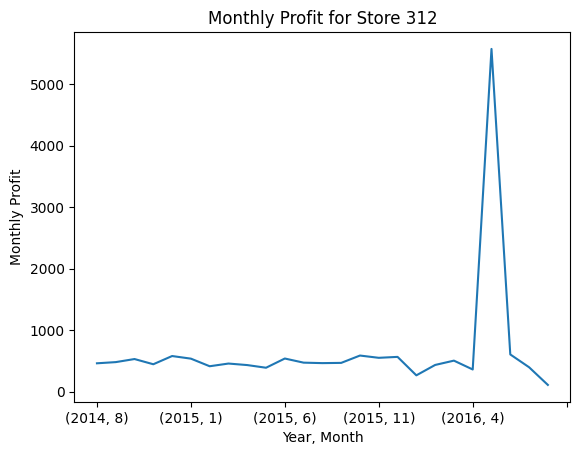

In [68]:
import matplotlib.pyplot as plt

Sorted_Monthly_Demand_Store.plot(kind='line')
plt.title('Monthly Profit for Store 312')
plt.xlabel('Year, Month')
plt.ylabel('Monthly Profit')

<img src='img\11.png'  style="float:right"/>

In [69]:
main3.sample(5)

,DB_ID,SKU,Store,Date,Unit Sales,Dollar Sales,Month,Year,Cost,Price,monthly_avg_sales,MA_Ex,Week,China
3038,1001016,8000520021,312,2016-07-26,1.0,9.99,7,2016,7.5,9.99,5.0,1,30,0
9090,1146028,50012011240,415,2005-10-15,1.0,7.99,10,2005,2.5,7.99,2.0,0,41,1
11563,66618,8000520021,521,2005-02-18,4.0,39.96,2,2005,7.5,9.99,5.0,1,7,0
6832,83500,50012011341,323,2006-07-14,1.0,4.99,7,2006,8.0,6.99,2.0,0,28,1
17235,79242,50012011240,632,2005-10-13,2.0,15.98,10,2005,2.5,7.99,2.0,0,41,1


In [70]:
temp_main5 = main3[['SKU', 'Store', 'Date', 'Dollar Sales', 'Year']].copy()
temp_main5.head()
# retail.InvoiceDate.dt.day_name(locale='En')
# retail.InvoiceDate.dt.day_of_week

,SKU,Store,Date,Dollar Sales,Year
0,50012011250,312,2014-08-04,29.97,2014
1,50012011250,312,2014-08-05,19.98,2014
2,50012011250,312,2014-08-06,49.95,2014
3,50012011250,312,2014-08-07,29.97,2014
4,50012011250,312,2014-08-08,69.93,2014


In [71]:
temp_main5.loc[:,'Day_of_Week'] = temp_main5.Date.dt.day_name(locale='En')

temp_main5.head()

,SKU,Store,Date,Dollar Sales,Year,Day_of_Week
0,50012011250,312,2014-08-04,29.97,2014,Monday
1,50012011250,312,2014-08-05,19.98,2014,Tuesday
2,50012011250,312,2014-08-06,49.95,2014,Wednesday
3,50012011250,312,2014-08-07,29.97,2014,Thursday
4,50012011250,312,2014-08-08,69.93,2014,Friday


In [72]:
Store_Code = 312
temp_main5_Store = temp_main5[temp_main5['Store']==Store_Code]
temp_main5_Store.head()

,SKU,Store,Date,Dollar Sales,Year,Day_of_Week
0,50012011250,312,2014-08-04,29.97,2014,Monday
1,50012011250,312,2014-08-05,19.98,2014,Tuesday
2,50012011250,312,2014-08-06,49.95,2014,Wednesday
3,50012011250,312,2014-08-07,29.97,2014,Thursday
4,50012011250,312,2014-08-08,69.93,2014,Friday


In [73]:
temp_main5_Store.Store.nunique()

1

In [74]:
# temp_main5_Store.Year.nunique()
temp_main5_Store.Year.value_counts()

Year
2015    1755
2016    1139
2014     653
Name: count, dtype: int64

In [75]:
temp_main5_Store_LastYear = temp_main5_Store[temp_main5_Store['Year'] == 2016]
temp_main5_Store_LastYear.head()

,SKU,Store,Date,Dollar Sales,Year,Day_of_Week
427,50012011250,312,2016-01-01,29.97,2016,Friday
428,50012011250,312,2016-01-02,69.93,2016,Saturday
429,50012011250,312,2016-01-04,39.96,2016,Monday
430,50012011250,312,2016-01-05,49.95,2016,Tuesday
431,50012011250,312,2016-01-06,9.99,2016,Wednesday


In [76]:
temp_main5_Store_LastYear.Year.value_counts()

Year
2016    1139
Name: count, dtype: int64

In [77]:
temp_main6 = temp_main5_Store_LastYear[['SKU', 'Date', 'Dollar Sales', 'Day_of_Week']]
temp_main6.head()

,SKU,Date,Dollar Sales,Day_of_Week
427,50012011250,2016-01-01,29.97,Friday
428,50012011250,2016-01-02,69.93,Saturday
429,50012011250,2016-01-04,39.96,Monday
430,50012011250,2016-01-05,49.95,Tuesday
431,50012011250,2016-01-06,9.99,Wednesday


In [78]:
grp_temp_main6 = temp_main6.groupby('Day_of_Week').agg(
    Totall_Sale = ('Dollar Sales', 'sum')
).reset_index()
grp_temp_main6.sort_values(by='Totall_Sale', ascending=False)

,Day_of_Week,Totall_Sale
0,Friday,35215.46
2,Saturday,27779.84
3,Thursday,18802.09
4,Tuesday,17876.55
1,Monday,17620.47
5,Wednesday,16220.95


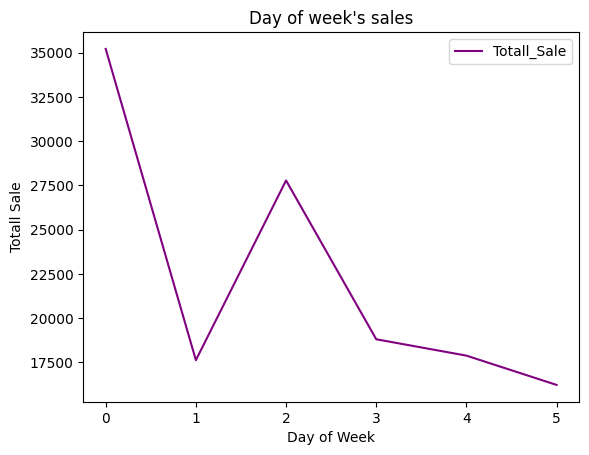

In [79]:
grp_temp_main6.plot(kind='line', color='purple')
plt.title("Day of week's sales")
plt.xlabel('Day of Week')
plt.ylabel('Totall Sale');